In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('onlinedeliverydata.csv')
df1.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [ ]:
num_col = df1.select_dtypes(include=['int64','float64']).columns                    #list of numerical columns
cat_col = df1.select_dtypes(include=['object','category']).columns                  #list of categorical columns


In [ ]:
print(num_col)

Index(['Age', 'Family size', 'latitude', 'longitude', 'Pin code'], dtype='object')


In [ ]:
print(cat_col)

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)',
       'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
       'High Quality of package', '

There are more Categorical variables than numerical variables.

We can use latitude longitude and pin code for geospatial analysis

We can encode the categorical variables

In [ ]:
df1.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


The average age of customers is around 25 years with min 18 and max 33 yrs

Average Familysize of customers is 4

###Demographic Analysis

We could use pivot table fucntionality of pandas to find some categorial data patterns because the problem is also that there is more categorical data than numerical data

In [ ]:
df1_pivot1 = pd.pivot_table(df1, index= ['Gender', 'Marital Status'],
                            values = ['Age', 'Family size'],
                            aggfunc = ['mean','count'],
                            margins = True)
#print(df1_pivot1)

cm = sns.light_palette('green', as_cmap = True)
df1_pivot1.style.background_gradient(cmap = cm)

This tells us that average age of female and males when single is around 23years

and average age of males and females who are married is aroud 27 - 28 for females and males

More Men are Single than females

In [ ]:
df1_pivot2 = pd.pivot_table(df1, index = ['Gender','Occupation', 'Monthly Income', 'Educational Qualifications'],
                            values = ['Age', 'Family size'], columns = ['Influence of time'],
                            aggfunc = ['mean','count'])

cm = sns.light_palette('yellow', as_cmap = True)
df1_pivot2.style.bar(cmap = cm)


#df1_pivot2.style.background_gradient(cmap = cm)

In [ ]:
df1_pivot3 = pd.pivot_table(df1, index = ['Order Time', 'Maximum wait time'],
                      values = [ 'Good Taste ', 'Good Food quality' ], columns = ['Influence of time'],
                      aggfunc = {'Influence of time' : len},
                      fill_value = 0)

cm = sns.light_palette('blue', as_cmap = True)
#df1_pivot2.style.bar(cmap = cm)


df1_pivot3.style.background_gradient(cmap = cm)

###Univariate Visualizations



/tmp/ipython-input-3318983121.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




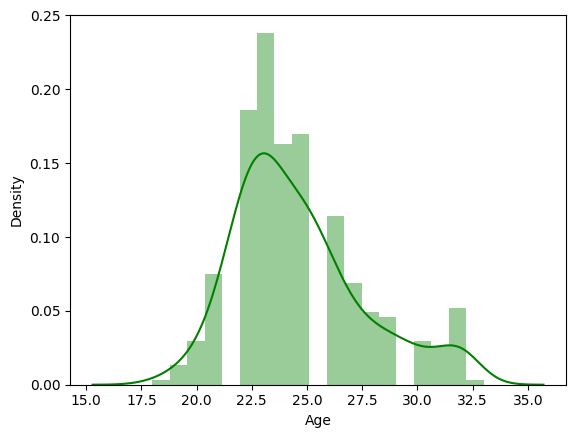

In [ ]:
#Study of Age of customers

plot1 = sns.distplot(df1['Age'], color = 'green', kde = True)

/tmp/ipython-input-4042094681.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




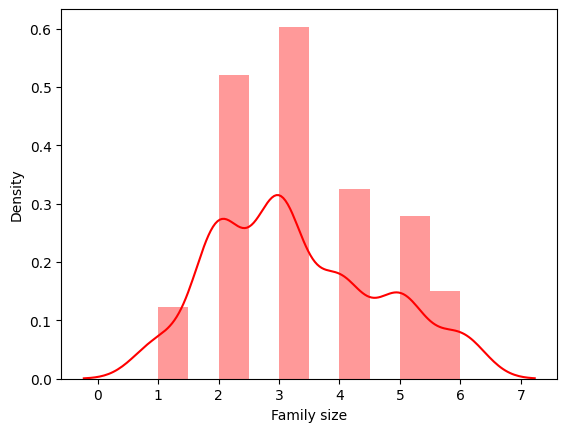

In [ ]:
plot2 = sns.distplot(df1['Family size'], color = 'red', kde = True)

In [ ]:
plot3 = px.box(df1, x= 'Age')
plot3.show()

In [ ]:
plot4 = px.box(df1, x = 'Family size')
plot4.show()

In [ ]:
plot5 = px.pie(df1,names = 'Gender', title = "Gender wise breakdown of Customers")
plot5.show()

In [ ]:
plot6 = px.bar(df1, x = 'Gender')
plot6.show()

In [ ]:
plot7 = px.bar(df1, x = 'Marital Status')
plot7.show()

In [ ]:
plot7 = px.pie(df1, names = 'Marital Status')
plot7.show()

In [ ]:
plot8 = px.bar(df1, x = 'Occupation')
plot8.show()

In [ ]:
plot8 = px.bar(df1, x = 'Monthly Income')
plot8.show()

In [ ]:
plot9 = px.bar(df1, x = 'Meal(P1)')
plot9.show()

##Conclusions

